### 3.1 분류 알고리즘 선택

머신 러닝 알고리즘을 훈련하기 위한 단계
1. 특성을 선택하고 훈련 샘플을 모음
2. 성능 지표 선택
3. 학습 알고리즘을 선택하고 모델을 훈련
4. 모델의 성능을 평가
5. 알고리즘 설정을 바꾸고 모델을 튜닝

### 3.2 사이킷런 첫걸음 : 퍼셉트론 훈련

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print("클래스 레이블 : ", np.unique(y))

클래스 레이블 :  [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # stratify=y : 계층화 기능(훈련 데이터셋과 테스트 데이터셋의 클래스 레이블 비율을 입력 데이터셋과 동일하게)

In [3]:
print("y의 레이블 카운트 : ", np.bincount(y))
print("y_train의 레이블 카운트 : ", np.bincount(y_train))
print("y_trest의 레이블 카운트 : ", np.bincount(y_test))

y의 레이블 카운트 :  [50 50 50]
y_train의 레이블 카운트 :  [35 35 35]
y_trest의 레이블 카운트 :  [15 15 15]


In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [6]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수 : ', (y_test != y_pred).sum())

잘못 분류된 샘플 개수 :  1


In [7]:
from sklearn.metrics import accuracy_score

print('정확도 : ', accuracy_score(y_test, y_pred))
print('정확도 : ', ppn.score(X_test_std, y_test))

정확도 :  0.9777777777777777
정확도 :  0.9777777777777777


In [8]:
# 2차원 데이터셋의 결정 경계를 시각화
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx = None, resolution=0.02):
    # 마커와 컬러맵을 설정
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그림
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그림
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx], label=f"Class {cl}", edgecolor='black')

        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            
            plt.scatter(X_test[:,0], X_test[:,1], c='none', edgecolor='black',alpha=1.0, linewidth=1, marker='o',s=100, label='Test Set')

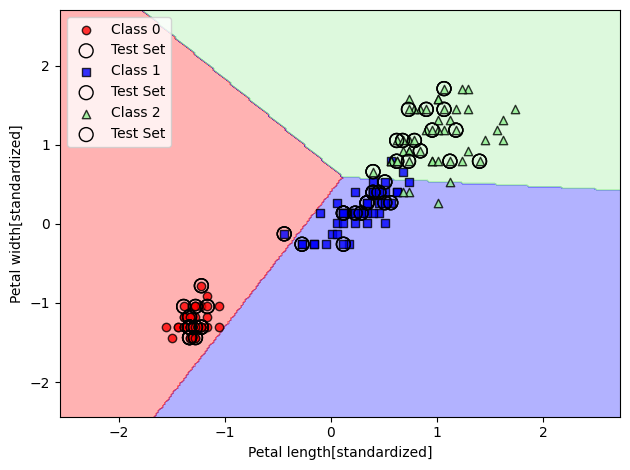

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, ppn, range(105, 150))

plt.xlabel('Petal length[standardized]')
plt.ylabel('Petal width[standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 3.3 로지스틱 회귀를 사용한 클래스 확률 모델링

<strong>퍼셉트론은 클래스가 선형적으로 구분되지 않을 때 수렴할 수 없음</strong>

→ 선형 이진 분류에 더 강력한 <strong>로지스틱 회귀</strong> 사용

#### 3.3.1 로지스틱 회귀의 이해와 조건부 확률

로지스틱 회귀 모델 : 이진 분류를 위한 선형 모델   
다항 로지스틱 회귀 모델(소프트맥스) : 다향 분류를 위한 선형 모델
   
오즈비 : 특정 이벤트가 발생할 확률 $\frac{P}{1-P} $   
P : 양성 샘플일 확률(양성 : 예측하려는 대상)   
    → 확률 $p$를 특성이 $x$인 샘플이 클래스 1에 속할 조건부 확률 $p := p(y = 1 | x)$    


로짓 함수 정의   
$\begin{align} \notag logit(P) = log\frac{P}{1-P} \end{align}$
   
(로지스틱) 시그모이드 함수 : logit 함수를 거꾸로 뒤집은 함수
$\begin{align} \notag σ(z) = \frac{1}{1 + e^{-z}} \end{align}$


In [10]:
def sigmoid(z) :
    return 1 / (1 + np.exp(-z))

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\cho03\AppData\Local\Temp\ipykernel_1708\1171248289.py:7: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma(z)$')


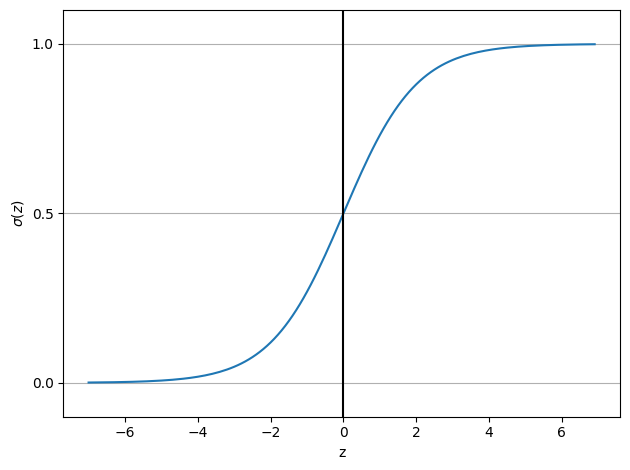

In [11]:
z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
# y측의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

가중치($w$)와 절편($b$) 파라미터를 사용하여 특성 $x$에 대한 시그모이드 함수의 출력을 특정 샘플이 클래스 1에 속할 확률 $σ(z) = p(y = 1|x;w,b)$로 해석   
   
ex. 어떤 붓꽃 샘플이 $σ(z) = 0.8$이면 이 샘플은 Iris-versicolor일 확률이 80% 

#### 3.3.2 로지스틱 손실 함수의 가중치 학습

평균 제곱 오차 손실 함수
$\begin{align} \notag 
    L(w,b) = \frac{1}{n}\sum_{i=1}^N (y^{(i)}-σ(z^{(i)}))^2
\end{align}$   
   
로지스틱 회귀의 손실 함수 유도 방법(최대 가능도 함수 이용)
$\begin{align} 
    L(w,b|x) = p(y|x;w,b) = \prod_{i=1}^N p(y^{(i)}|x^{(i)};w,b) = \prod_{i=1}^N σ(z^{(i)})^{y{(i)}}(1-σ(z^{(i)}))^{1-y^{(i)}}   
\end{align}$   

$\begin{align} 
    l(w,b|x) = logL(w,b|x) = \sum [y^{(i)}log(σ(z^{(i)})) + (1-y^{(i)})log(1-σ(z^{(i)})]
\end{align}$

$\begin{align} \notag 
    L(w,b|x) = \sum [-y^{(i)}log(σ(z^{(i)})) - (1-y^{(i)})log(1-σ(z^{(i)})]
\end{align}$

<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\cho03\AppData\Local\Temp\ipykernel_1708\1659993748.py:16: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma(z)$')


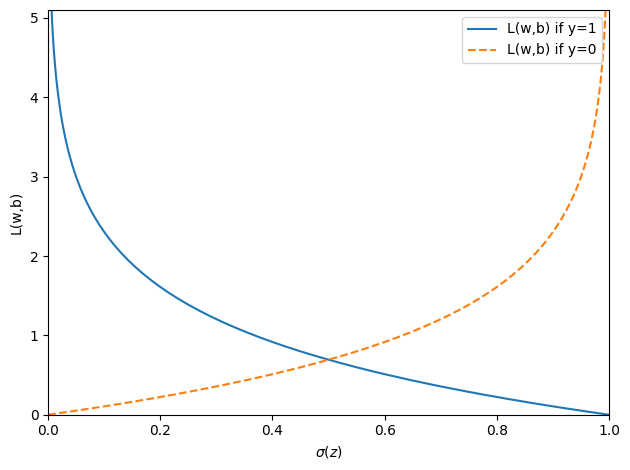

In [12]:
# 샘플이 하나일 경우 σ(z) 값에 대한 분류 손실
def loss_1(z):
    return -np.log(sigmoid(z))

def loss_0(z):
    return -np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w,b) if y=1')
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, label='L(w,b) if y=0', linestyle='--')
plt.ylim(0.0, 5.1)
plt.xlim(0, 1)
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w,b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<strong>→ 잘못된 예측에 점점 더 큰 손실을 부여</strong>

#### 3.3.3 아달린 구현을 로지스틱 회귀 알고리즘으로 변경

In [13]:
class LogisticRegressionGD:
    """ 경사 하강법을 사용한 로지스틱 회귀 분류기
    
    매개변수
    ------------
    eta : float
        학습률(0.0과 1.0 사이)
    
    n_iter : int
        훈련 데이터셋 반복 횟수

    random_state : int
        가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    ------------
    w_ : 1d-array
        학습된 가중치
    
    b_ : 스칼라
        학습된 절편 유닛

    errors_ : list
        에포크마다 누적된 분류 오류
    
    """
    def __init__(self, eta=0.01, n_iter=50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ 훈련 데이터 학습
        
        매개변수
        ------------
        X : {array-like}, shape = [n_samples, n_features]
            n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터

        y : array-like, shape = [n_samples]
            타깃 값

        반환값
        ------------
        self : LogisticRegressionGD 객체
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1 - output))) / X.shape[0])
            self.losses_.append(loss)

    def net_input(self, X):
        """ 최종 입력 계산 """
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, z):
        """ 로지스틱 시그모이드 활성화 계산 """
        return 1 / (1 + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, x):
        """ 단위 계단 함수를 사용하여 클래스 레이블을 반환 """
        return np.where(self.activation(self.net_input(x)) >= 0.5, 1, 0)

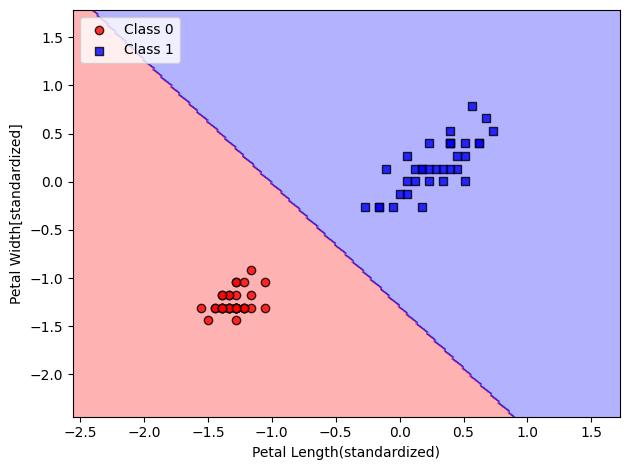

In [14]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)

lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X_train_01_subset, y_train_01_subset, classifier=lrgd)
plt.xlabel('Petal Length(standardized)')
plt.ylabel('Petal Width[standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

#### 3.3.4 사이킷런을 사용하여 로지스틱 회귀 모델 훈련

d:\공부\MLDL\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


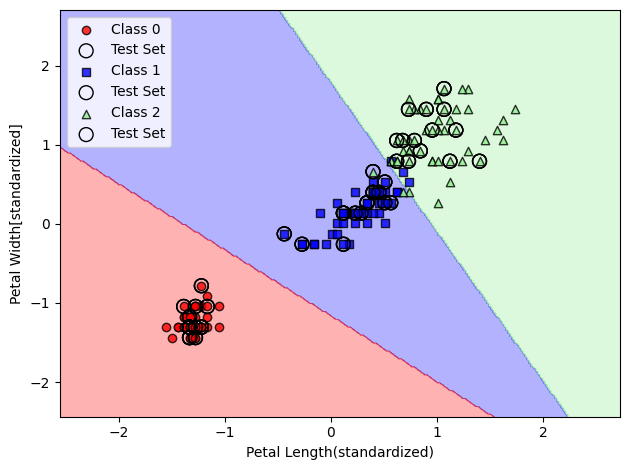

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='multinomial')
# C : 규제(오버피팅 관련)
# multi_class='ovr' : 다중 분류 데이터셋을 여러 개의 이중 분류 셋으로 쪼갠 후, 각 이중 분류 셋에 대해 이진 분류 수행 -> 결과를 비교해서 가장 결과 좋은 모델을 최종 모델로 선정
# multi_class='multinomial' : 다항 로지스틱 회귀(소프트맥스) : 각 클래스에 대한 확률 분포를 한번에 추정
# solver = 'lbfgs' : 사용할 알고리즘 선택(기본값이 1bfgs)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal Length(standardized)')
plt.ylabel('Petal Width[standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

#### 3.3.5 규제를 사용하여 과대적합 피하기

- 과대 적합 : 모델이 훈련 데이터에 과도하게 적합 -> 테스트 데이터에서 잘 일반화되지 않음   
모델 파라미터가 너무 많아 너무 복잡한 모델을 만듦(분산이 큼)
- 과소 적합 : 훈련 데이터에 적합 X(편향이 큼)   
   
<strong>규제</strong> : 공선성(특성 간의 높은 상관관계)을 다루거나 데이터에서 잡음을 제거하여 과대적합을 방지할 수 있는 매우 유용한 방법
- L2 규제   
$\begin{align} \notag
    \frac{λ}{2n}||w||^2 = \frac{λ}{2n}\sum_{j=1}^M w_j^2
\end{align}$   
    - λ : 규제 하이퍼파라미터
    - 분모의 2 : 단순한 스케일링 계수
    - n : 샘플 크기

즉 규제를 추가항 로지스틱 회귀 손실 함수
$\begin{align} \notag
    L(w,b|x) = p(y|x;w,b) = \prod_{i=1}^N p(y^{(i)}|x^{(i)};w,b) = \prod_{i=1}^N σ(z^{(i)})^{y{(i)}}(1-σ(z^{(i)}))^{1-y^{(i)}} + \frac{λ}{2n}||w||^2
\end{align}$   

d:\공부\MLDL\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\공부\MLDL\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\공부\MLDL\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\공부\MLDL\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5

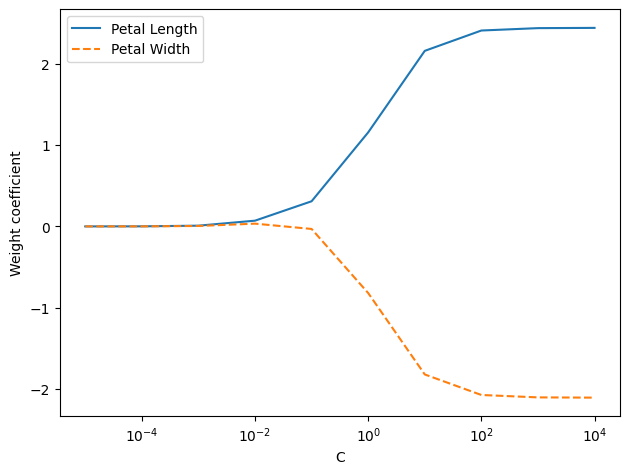

In [16]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C = 10.**c, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:,0],label='Petal Length')
plt.plot(params, weights[:,1],linestyle='--', label='Petal Width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.tight_layout()
plt.xscale('log')
plt.show()

규제 강도를 너무 커서 가중치가 ∅에 가까워지면 과소적합

### 3.4 서포트 벡터 머신을 사용한 최대 마진 분류

<strong>서포트 벡터 머신(SVM)</strong> : 퍼셉트론의 확장, 마진(클래스를 구분하는 경계와 이 경계에 가장 가까운 훈련 샘플 사이의 거리)을 최대화하는 것
![](image/서포트%20벡터%20머신.jpg)

#### 3.4.1 최대 마진
큰 마진의 경계를 원하는 이유 : 일반화 오차가 낮아짐, 작은 마진의 모델을 과대적합되기 쉬움

#### 3.4.2 슬랙 변수를 사용하여 비선형 분류 문제 다루기
- 하드 마진 분류 : 슬랙 변수가 없는 경우
- 소프트 마진 분류 : 슬랙 변수가 있는 경우
    슬랙 변수 : 선형적으로 구분되지 않는 데이터에서 선형 제약 조건을 완화할 필요가 있기 때문에 도입 -> 최적화 알고리즘이 수렴   
    => 슬랙 변수를 사용하면 SVM의 C 매개변수가 도입됨   
    => C를 사용하여 분류 오차에 대한 패널티 조정   
    - C 값이 크면 : 오차에 대한 손실이 커짐   
    - C 값이 작으면 : 분류 오차에 덜 엄격   
    ![](image/SVM-C.jpg)

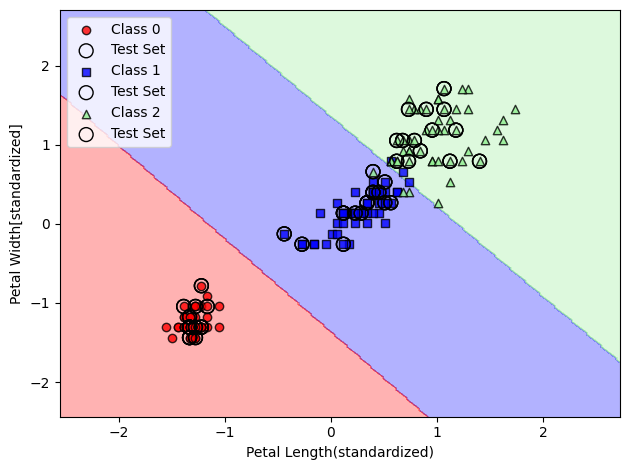

In [17]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state = 1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx= range(105, 150))

plt.xlabel('Petal Length(standardized)')
plt.ylabel('Petal Width[standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

#### 3.4.3 사이킷런의 다른 구현(SGDClassifier)

In [18]:
from sklearn.linear_model import SGDClassifier
# 퍼셉트론의 확률적 경사 하강법
ppn = SGDClassifier(loss='perceptron')

# 로지스틱 회귀의 확률적 경사 하강법
lr = SGDClassifier(loss='log')

# 서포트 벡터 머신의 확률적 경사 하강법
svm = SGDClassifier(loss='hinge')

### 3.5 커널 SVM을 사용하여 비선형 문제 풀기

#### 3.5.1 선형적으로 구분되지 않는 데이터를 위한 커널 방법

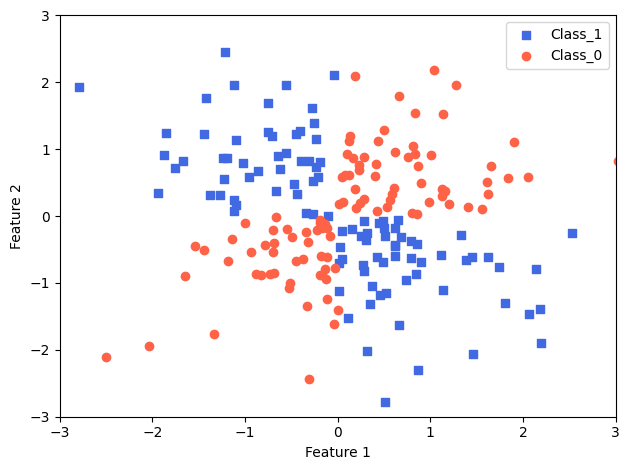

In [19]:
# 넘파이 logical_xor 함수를 사용하여 XOR 형태의 간단한 데이터셋을 만듦
# 100개의 샘플은 1로 할당, 나머지는 01로 할당
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)  # 0.5를 기준으로 XOR 연산
y_xor = np.where(y_xor, 1, 0)

# 시각화
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='royalblue', marker='s', label='Class_1')
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], c='tomato', marker='o', label='Class_0')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


양성 클래스와 음성 클래스를 선형 초평면으로 구분 X -> 매핑 함수 ∅를 사용하여 원본 특성의 비선형 조합을 선형적으로 구분되는 고차원 공간에 투영
$\begin{align} \notag ∅(x_1, x_2) = (z_1, z_2, z_3) = (x_1, x_2, x_1^2 + x_2^2)\end{align}$   
![](image/SVM-커널.jpg)

#### 3.5.2 커널 기법을 사용하여 고차원 공간에서 분할 초평면 찾기

매핑 방식의 문제 : 새로운 특성을 만드는 계산 손실이 매우 비쌈   
두 포인트 사이 점곱을 계산하는 데 드는 높은 손실을 절감하기 위해 커널 함수를 정의
$\begin{align} \notag K(x^{(i)}, x^{(j)}) = ∅(x^{(i)})^T ∅(x^{(j)})\end{align}$   
   
   <strong>커널 : 샘플 간의 유사도 함수</strong>(gamma)

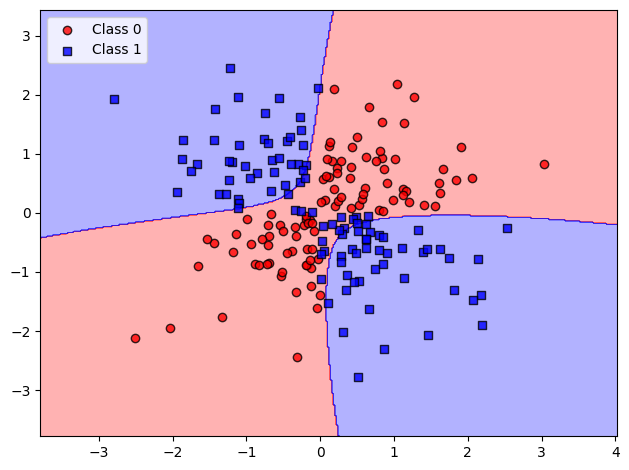

In [20]:
svm = SVC(kernel='rbf', random_state = 1, gamma=0.10 , C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

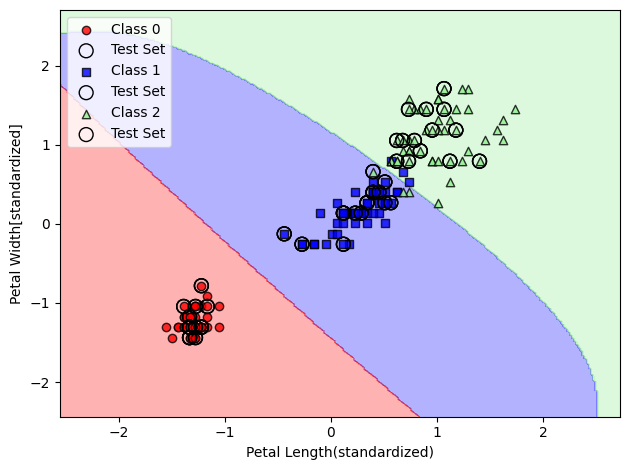

In [21]:
svm = SVC(kernel='rbf', random_state = 1, gamma=0.2 , C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx= range(105, 150))

plt.xlabel('Petal Length(standardized)')
plt.ylabel('Petal Width[standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

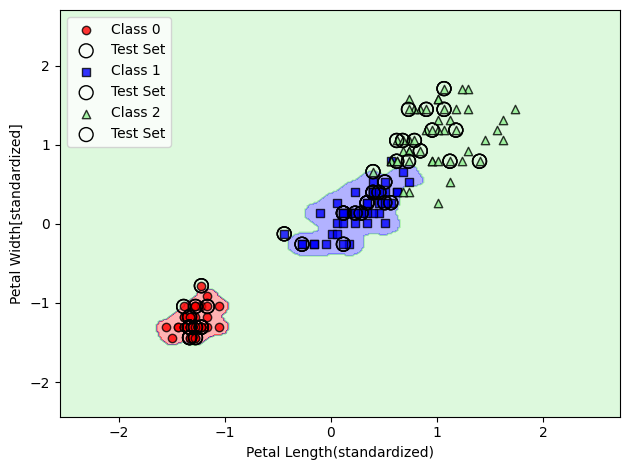

In [22]:
svm = SVC(kernel='rbf', random_state = 1, gamma=100.0 , C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx= range(105, 150))

plt.xlabel('Petal Length(standardized)')
plt.ylabel('Petal Width[standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

### 3.6 결정 트리 학습 : 일련의 질문에 대한 결정을 통해 데이터를 분해하는 모델
정보 이득(IG)이 최대가 되는 특성으로 데이터를 나눔
- 일반적으로 트리의 최대 깊이를 제한하여 트리를 가지치기 함(과대적합 방지)

#### 3.6.1 정보 이득 최대화 : 자원을 최대로 활용

정보 이득
$\begin{align} \notag IG(D_p, f) = I(D_p) - \sum_{j=1}^m\frac{N_j}{N_p}I(D_j) \end{align}$
- $f$ : 분할에 사용할 특성
- $D_p, D_j$ : 부모와 j번째 자식 노드의 데이터셋
- $I$ : 불순도
- $N_p$ : 부모 노드에 있는 전체 샘플 게수
- $N_J$ : j번째 자식 노드에 있는 샘플 개수   
=> 정보 이득 = 부모 노드의 불순도와 자식 노드의 불순도 합의 차이 => 자식 노드의 불순도가 낮을 수록 정보 이득이 커짐

**부모 노드는 결국 2개의 자식 노드 $D_{right}$ 와 $D_{right}$로 나눠짐**
$\begin{align} \notag IG(D_p, f) = I(D_p) - \frac{N_{left}}{N_p}I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right}) \end{align}$

*결정 트리에서 널리 사용되는 3개의 불순도 지표 또는 분할 조건은 **지니 불순도, 엔트로피, 분류 오차***

##### 샘플이 있는 모든 클래스에 대한 엔트로피 정의는 다음과 같음
$\begin{align} \notag I_H(t) = - \sum_{i=1}^c p(i|t)log_{2} p(i|t) \end{align}$
- $p(i|t)$ : 특정 노드 t에서 클래스 i에 속한 샘플 비율(ex. 한 노드의 모든 샘플이 같은 클래스이면 엔트로피는 0) => 클래스 분포가 균등하면 엔트로피는 최대

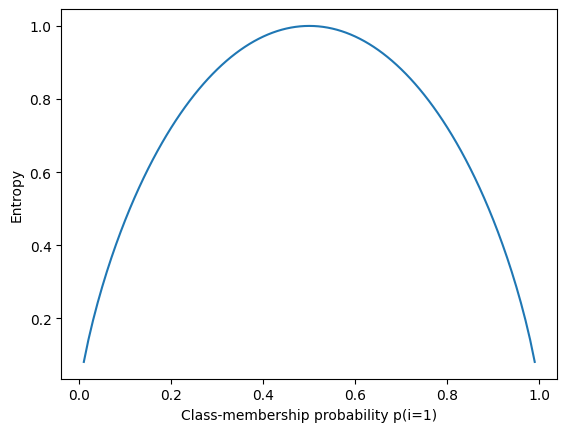

In [23]:
def entropy(p):
    return -p * np.log2(p) - (1-p) * np.log2((1-p))

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
plt.ylabel("Entropy")
plt.xlabel("Class-membership probability p(i=1)")
plt.plot(x, ent)
plt.show()

##### 지니 불순도 : 잘못 분류될 확률을 최소화하기 위한 기준
$\begin{align} \notag I_G(t) = \sum_{i=1}^c p(i|t)(1-p(i|t)) = 1- \sum_{i=1}^c p(i|t)^2 \end{align}$
**엔트로피와 비슷하게 지니 불순도는 클래스가 완벽하게 섞여 있을 때 최대가 됨**

##### 분류 오차
$\begin{align} \notag I_E = 1- max(p(i|t)) \end{align}$
**가지치기에는 좋은 기준이지만 결정 트리를 구성하는 데는 권장 X : 노드의 클래스 확률 변화에 덜 민감해서**

##### 앞서 나온 3개의 불순도 기준을 시각적으로 비교하기 위해 클래스 1의 확률 범위[0,1]에 대한 불순도 인덱스를 그림

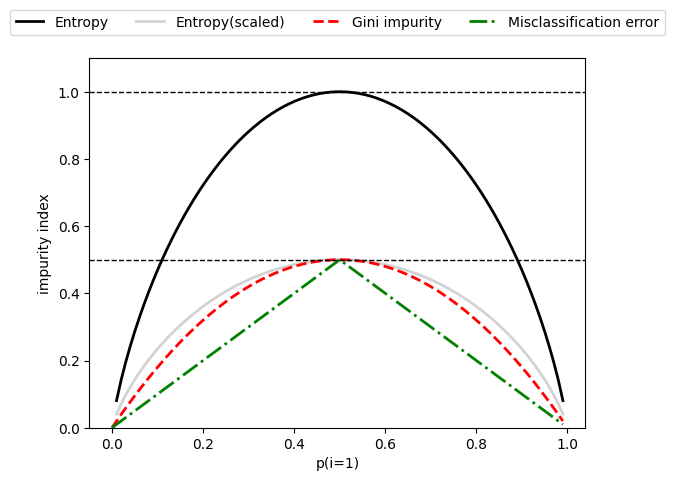

In [24]:
# 0과 1사이에서 클래스 소속 확률 변화에 따른 불순도 지표
def gini(p):
    return p * (1-p) + (1-p)*(1-(1-p))

def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))

def error(p):
    return 1- np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c in zip([ent, sc_ent, gini(x), err], ['Entropy','Entropy(scaled)','Gini impurity','Misclassification error'], ['-','-','--','-.'], ['black','lightgray','red','green','cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

#### 3.6.2 결정 트리 만들기

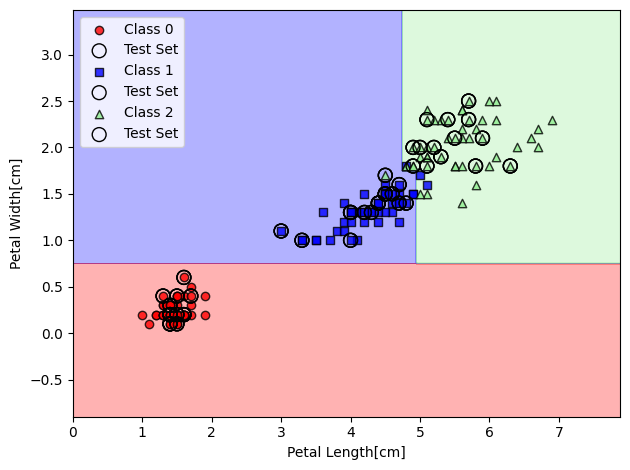

In [30]:
# 지니 불순도 조건으로 최대 깊이가 4인 결정 트리
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105, 150))

plt.xlabel("Petal Length[cm]")
plt.ylabel("Petal Width[cm]")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

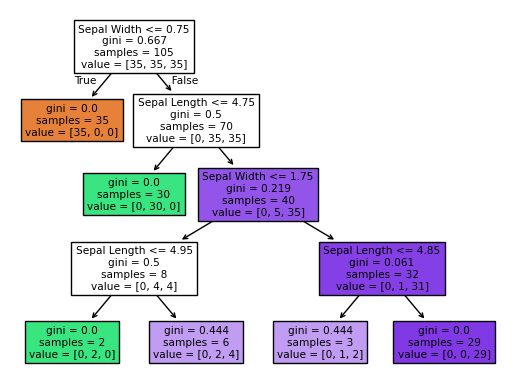

In [31]:
from sklearn import tree
feature_names = ['Sepal Length','Sepal Width', 'Petal Length', 'Petal Width']
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)
plt.show()

#### 3.6.3 랜덤 포레스트로 여러 개의 결정 트리 연결(결정 트리의 앙상블)
1. n개의 랜덤한 **부트스트랩** 샘플을 뽑음(훈련 데이터셋에서 중복을 허용하면서 랜덤하게 n개의 샘플 선택)
2. 부트스트랩 샘플에서 결정 트리를 학습. 각 노드에서 다음과 같이 함
    a. 중복을 허용하지 않고 랜덤하게 d개의 특성 선택
    b. 정보 이득과 같은 목적 함수를 기준으로 최선의 분할을 만드는 특성을 사용해서 노드를 분할
3. 단계 1~2를 k번 반복
4. 각 트리의 예측을 모아 **다수결 투표**로 클래스 레이블을 할당   
   

**실전에서 신경 써야 할 파라미터는 랜덤 포레스트가 만들 트리 개수 하나**

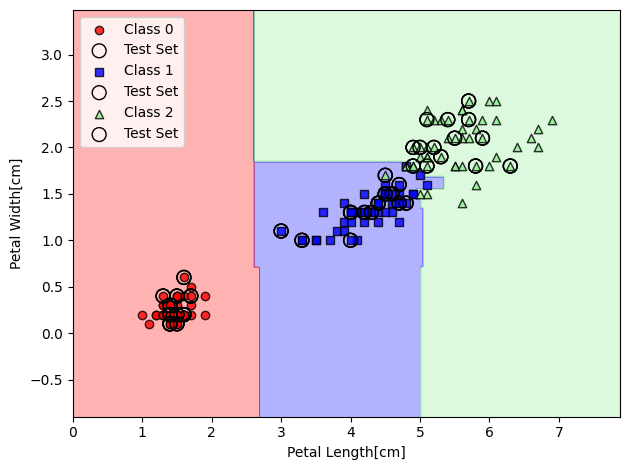

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))

plt.xlabel("Petal Length[cm]")
plt.ylabel("Petal Width[cm]")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### 3.7 k-최근접 이웃 : 게으른 학습 알고리즘

1. 숫자 k와 거리 측정 기준을 선택
2. 분류하려는 샘플에서 k개의 최근접 이웃을 할당
3. 다수결 투표를 통해 클래스 레이블을 할당   
=> 분류하려는 포인트와 가장 가까운(비슷한) 샘플 k개를 찾아서, 이 k개의 샘플 중 가장 많은 수를 차지하는 레이블을 할당

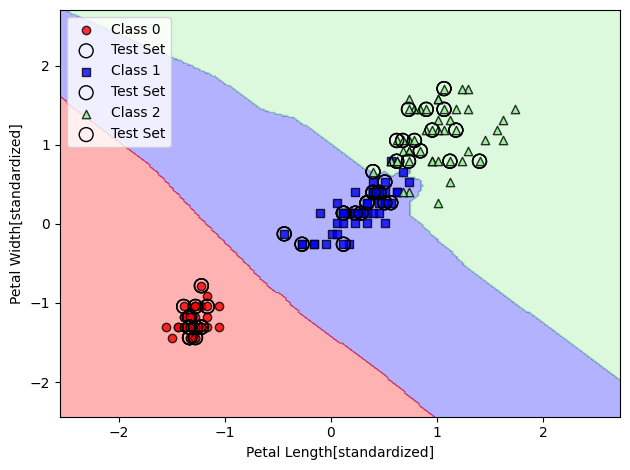

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski') # 민코우스키 거리 사용
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))

plt.xlabel("Petal Length[standardized]")
plt.ylabel("Petal Width[standardized]")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

*적절한 **k**를 선택하는 것이 중요(과대적합, 과소적합 사이)*
- p=2 : 유클리드 거리
- p=1 : 맨해튼 거리   

**KNN은 차원의 저주 때문에 과대적합되기 쉬움**

차원의 저주 : 훈련 데이터셋이 차원이 늘어남에 따라 가장 가까운 이웃이라도 좋은 추정 값을 만들기에는 너무 멀리 떨어져 있음